# ラベルなしのデータ分析- クラスタ分析
参 考
* S.Raschka Python機械学習プログラミング

教師なし学習法に属するクラスタリングについて見ていく。ここでは
* [プロトタイプベースクラスタリング]k-means法
* [階層的クラスタリング]階層的クラスタ木をボトムアップ方式で構築
* [密度ベースクラスタリング]密度に基づくクラスタリングアプローチによってオブジェクトの任意の形状を識別

をみていく。

## k-means法
類似したオブジェクトをグループにまとめることが可能。また、他のクラスタリングアルゴリズムに比べて計算効率が良い。<p>
k-means法は**プロトタイプベースクラスタリング**に属す。これは、各クラスタがプロトタイプによって表されることを意味する。プロトタイプは**セントロイド**(特徴量が連続値の場合に類似する点の中心を表す)か**メドイド**(特徴量がカテゴリ値の場合に最も代表的or最も頻度が高い点を表す)のどちらかになる。<p>
k-means法が最も効果的なのは「球状or円状クラスタの識別」である。一方、欠点は*クラスタの個数kを指定しなければならない*ことで、これが不適切の場合クラスタリング性能が落ちる。なお、クラスタリング性能の評価に役立つ**エルボー法**と**シルエット図**というものもある。

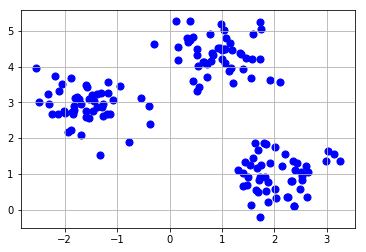

In [32]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

x, y = make_blobs(n_samples = 150,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.5,
                  shuffle = True,
                  random_state = 0)
plt.scatter(x[:,0], x[:,1], c='blue', marker='o', s=50)
plt.grid()
plt.show()

ここで作成したデータを、k-means法を用いてクラスタリングしていく。

k-means法のステップは次の4つである。
1. クラスタの中心の初期値として、サンプル点からk個のセントロイドをランダムに選ぶ。
1. 各サンプルを最も近いセントロイド$\mu^{(i)}$に割り当てる。$$\mu^{(i)},\ j\in\{1,\dots,k\}$$
1. セントロイドに割り当てられたサンプルの中心にセントロイドを移動する
1. サンプル点へのクラスタの割り当てが変化しなくなるか、ユーザー定義の許容値またはイテレーションの最大回数に達するまでステップ2-3を繰り返す

#### *オブジェクトの類似度を測定するにはどうすればいいか？*

類似度を「距離が離れていないこと」として定義する。連続値の特徴量を持つサンプルのクラスタリングにおいてよく使われる距離は**ユークリッド距離の２乗**で、例えばm次元空間の場合
$$d(x,y)^2 = \displaystyle\sum_{j=1}^m(x_j-y_j)^2=||x-y||^2$$
以下、$i$:サンプルのインデックス、$j$:クラスタのインデックスとする。

オブジェクトの類似性を図る指標としてユークリッド距離を用いて、単純な最適化問題としてのk-means法を説明する。**クラスタ内誤差平方和(SSE)**(クラスタの慣性)を反復的に最小化するという単純な最適化問題を取りあげる。$$SSE=\displaystyle\sum_{i=1}^n\sum_{j=1}^kw^{(i,j)}||x^{(i)}-\mu^{(j)}||^2_2$$
但し、$\mu^{(j)}$：クラスタjのセントロイドであり、サンプル点$x^{i}$がクラスタ内に存在する場合$w^{(i,j)}=1$、存在しないときは0である。

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
            init = 'random', #セントロイドの初期値をランダム選択
            n_init = 10, #異なるセントロイド初期値を用いたk-meansの実行回数
            max_iter = 300, #k-means内部のmaxイテレーション回数
            tol = 1e-04, #収束判定を出す許容誤差
            random_state = 0)
y_km = km.fit_predict(x)

### k-means++法
初期のセントロイドを互いに離れた位置に配置することにより、従来のk-means法より効果的な、より一貫性のある結果を得られる。

1. 選択対象となるk個のセントロイドを格納するために、空のデータセット$M$を初期化する。
1. 入力サンプルから初期のセントロイド$\mu^{(j)}$をランダムに選択し、$M$に割り当てる。
1. $M$に含まれていないサンプル$x^{(i)}$ごとに$M$のセントロイドに対して距離$d(x^{(i)},M)$の2乗が最小となるようなセントロイドを求める。
1. 次のセントロイド$\mu^{(p)}$をランダムに選択するには、各サンプルの距離の重みを等しくした以下の確率分布を使用する。$$\dfrac{d(\mu^{(p)},M)^2}{\displaystyle\sum_id(x^{(i)},M)^2}$$
1. k個のセントロイドが選択されるまでステップ3-4を繰り返す
1. 従来のk-means法を使って引き続き処理を行う。

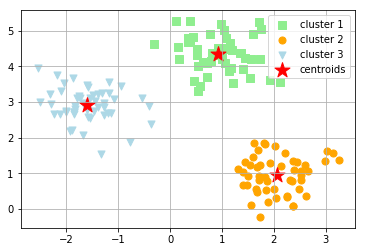

In [22]:
plt.scatter(x[y_km == 0, 0],
            x[y_km == 0, 1],
            s = 50,
            c = 'lightgreen',
            marker = 's',
            label = 'cluster 1')

plt.scatter(x[y_km == 1, 0],
            x[y_km == 1, 1],
            s = 50,
            c = 'orange',
            marker = 'o',
            label = 'cluster 2')

plt.scatter(x[y_km == 2, 0],
            x[y_km == 2, 1],
            s = 50,
            c = 'lightblue',
            marker = 'v',
            label = 'cluster 3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s = 250,
            marker = '*',
            c = 'red',
            label = 'centroids')

plt.legend()
plt.grid()
plt.show()

### エルボー法を使ってクラスタの最適な個数を求める
教師なし学習の主な課題 ==> 明確な答えがわからない。<p>
クラスタリングの性能を数値化するには、SSEのような指標を用いて、さまざまなk-meansクラスタリングの性能を比較する必要がある。KMeansモデルを適合した後は、inertia_属性を通じてこの値にアクセスすることができる。

In [23]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


このクラスタ内SSE(歪み)に基づき、エルボー法と呼ばれる図解によってタスクに最適なクラスタ数kを推定できる。直観的には、kの値が増えると歪みが減る。これは、サンプルがその割り当て先となるセントロイドに近くなるからである。エルボー法の考え方としては、SSEが最も急速に増え始めるkの値を特定する、というものである。kの値を変えていきながらSSEをプロットしていけば、これがどういうことかわかる。

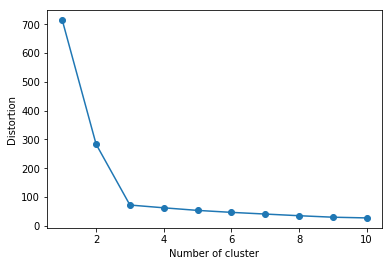

In [25]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

エルボー(ひじ)になってる部分はk=3だね。よって、k=3が一番よさげ。

### シルエット図を使ってクラスタリングの性能を数値化
シルエット分析は、k-means以外のクラスタリングアルゴリズムでも利用可能。シルエット分析では、クラスタ内のサンプルがどの程度密にグループ化されているかの目安となるグラフをプロットできる。データセットの単一のサンプルについてシルエット係数を計算するには
1. サンプル$x^{(i)}$と同じクラスタ内のその他のすべてのサンプルとの平均距離として、クラスタの凝集度$\alpha^{(i)}$を計算
2. サンプル$x^{(i)}$と最も近くにあるクラスタ内のすべてのサンプルとの平均距離として、その次に近いクラスタからの乖離度$b^{(i)}$を計算
3. クラスタの凝集度と乖離度の差を、それらのうち大きい方の値で割り、シルエット係数$s^{(i)}$を計算$$s^{(i)}=\dfrac{b^{(i)}-a^{(i)}}{\max{\{a^{(i)},b^{(i)}}\}}$$
を適用すればよい。以下、metricモジュールのsilhouette_samplesを用いて算出をする。

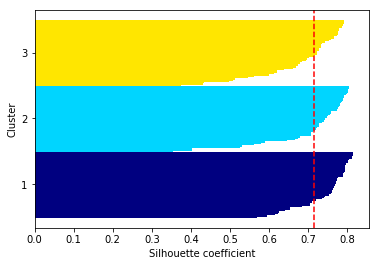

In [50]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters = 3,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(x)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(x, y_km, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i , c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)     #色の値をセット
    plt.barh(range(y_ax_lower, y_ax_upper), #水平の棒グラフを描画するよ
             c_silhouette_vals,             #棒の幅
             height = 1.0,                  #棒の高さ
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2)  #クラスタラベルの表示位置追加
    y_ax_lower += len(c_silhouette_vals)        #底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--") #係数の平均値に破線
plt.yticks(yticks, cluster_labels + 1) #ラベル表示
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

この図では、３つがだいたい同じ幅になった。これが、一つがやたら大きいときや小さいときは、最適なクラスタリングになっていないので、kの変更が必要、という判断になる。今回はうまくいっている。

## クラスタを階層木として構成
階層的クラスタリングの利点：樹形図をプロットできる、クラスタ数を事前に指定しなくてよい。

階層的クラスタリングには２つある。
* 分割型：すべてのサンプルを包含する１つのクラスタを定義し、すべてのクラスタにサンプルが１つだけ含まれた状態になるまでクラスタをより小さなクラスタに分割していく。
* 凝集型：個々のサンプルを１つのクラスタとして扱い、クラスタが１つだけ残った状態になるまで、最も近くにある２つのクラスタをマージしていく。凝集型階層的クラスタリングには、標準アルゴリズムとして２つある。
    * 単連結法：クラスタのペアごとに最も類似度が「高い」メンバーどうしの距離を計算し、最も類似度の高いメンバーどうしの距離が最小になるような方法で２つのクラスタをマージする
    * 完全連結法：クラスタのペアごとに最も類似度の「低い」メンバーどうしの距離を計算し、最も類似度の低いメンバーどうしの距離が最小になるような方法で２つのクラスタをマージする
    

完全連結法による凝集型階層的クラスタリングのステップ
1. 全サンプルの距離行列を計算する。
1. 各データ点を単一のクラスタとみなして表現する
1. 最も類似度の低い、つまり最も離れたメンバーの距離に基づいて２つの最も近いクラスタをマージする
1. 距離行列を更新
1. クラスタが１つだけのこた状態になるまでステップ3-4を繰り返す

##### サンプルデータの作成

In [5]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['x','y','z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
x = np.random.random_sample([5,3])*10  #サンプルデータの作成
df = pd.DataFrame(x, columns = variables, index = labels)
df

,x,y,z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


pandas：インデックス付けに便利。上のような表形式に加工するオブジェクトDataFrameは強い。

Scipy：科学計算領域での一般的な問題に取り組めるパッケージ群。数学的処理に強い。

##### 距離行列の計算

In [7]:
from scipy.spatial.distance import pdist, squareform
#pdist: 距離を計算、 squareform:対称行列を作成
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


##### 単純連結法による凝集型階層的クラスタリングを適用

In [8]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric = 'euclidean'), method='complete') #method:連結アルゴリズムの指定[completeは最遠点アルゴリズム]

In [9]:
#こっちでも可
row_clusters = linkage(df.values, method='complete',metric='euclidean')

In [12]:
pdist(df, metric = 'euclidean')

array([ 4.973534  ,  5.51665266,  5.89988504,  3.83539555,  4.34707339,
        5.10431109,  6.69823298,  7.24426159,  8.31659367,  4.382864  ])

In [14]:
pd.DataFrame(row_clusters,
             columns = ['row label 1',
                        'row label 2',
                        'distance',
                        'no. of items in clust.'],
             index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


##### この結果の読み方
* １、２行目：各クラスタ内で最も類似度の低いメンバー
* ３行目：それらのメンバーの距離
* ４行目：各クラスタのメンバーの個数

##### 結果を樹形図で表示

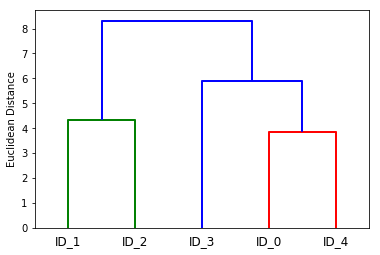

In [18]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr=dendrogram(row_clusters,
                      labels = labels)

plt.ylabel('Euclidean Distance')
plt.show()

ID_0とID_4が最も類似度の高いサンプル。その次はID_1とID_2が類似度高い。ということが視覚的にわかりやすい。

#### 樹形図をヒートマップと組み合わせる
実際に使うときは、樹形図とヒートマップの組み合わせで使用される。これによって、サンプルとする行列の個々の値をカラーコードで表せるようになる。

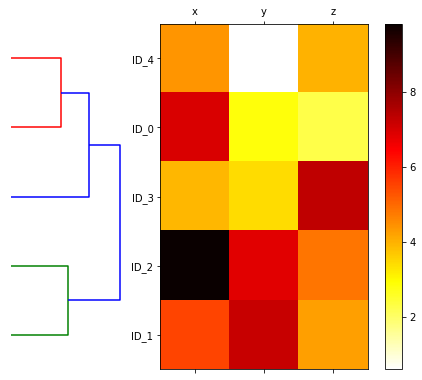

In [26]:
fig = plt.figure(figsize=(8,8), facecolor='white')
#樹形図の軸の位置、幅、高さを定義する
axd = fig.add_axes([0.09,0.1,0.2,0.6])
#樹形図を反時計回り90度回転
row_dendr = dendrogram(row_clusters, orientation='right')

#クラスタリングのラベルに従って、最初のDataFrameのデータを並び替える。クラスタリングのラベルにアクセスするにはキーとしてleavesを用いる
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

#並び替えたDataFrameを使ってヒートマップ作成、樹形図の横に配置
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

#軸の目盛除去、軸非表示、カラーバー追加、ラベル追加
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)

fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

### sklearn を使ってもできる
Scikit-learnを使ってもできるが、これが役立つのは取得したいクラスタ数を選択できることから階層クラスタ木の剪定を行うとき。上の例のデータを用いて例えばクラスタ数２にしてみる。

In [28]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2,
                            affinity = 'euclidean',
                            linkage = 'complete')
labels = ac.fit_predict(x)
print('cluster labels: %s' % labels)

cluster labels: [0 1 1 0 0]


ID_1,2が同じクラスタで、0,3,4が他のクラスタという風になった。たしかに。

## DBSCAN ー密度ベースクラスタリング
DBSCANはDentisy-based Spatial Clustering of Applications with Noiseの略である。ここでのDentisyは指定された半径$\varepsilon$以内の点の個数として定義される。DBSCANでは以下のようにして各サンプルに特別なラベルが割り当てられる
* 指定された半径$\varepsilon$以内に少なくとも指定された個数[MinPts]の隣接点があるような点は**コア点**とみなされる
* 半径$\varepsilon$以内の隣接点の個数がMinPtsに満たないものの、コア点の半径$\varepsilon$以内に位置するような点はボーダー点とみなされる
* コア点でもボーダー点でもないその他の点はすべてノイズ点とみなされる

アルゴリズムは次のような感じ
1. コア点ごとに(またはコア点の接続関係に基づいて)、別々のクラスタを形成する。コア点どうしが接続関係を持つのは、それらが$\varepsilon$より離れていない場合である
1. 各ボーダー点をそれと対になっているコア点のクラスタに割り当てる

DBSCANの良いところは
* k-means法のようにクラスタが円形であることを仮定していない
* 点をそれぞれクラスタに割り当てる必要がない
* ノイズ点を除去する能力がある

### 変な形のデータで３種のクラスタリングを比較

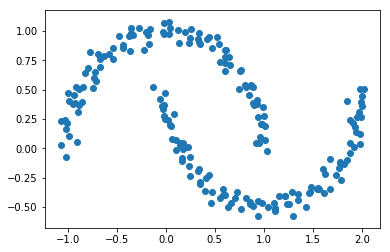

In [34]:
from sklearn.datasets import make_moons
x ,y = make_moons(n_samples = 200,
                  noise = 0.05,
                  random_state = 0)
plt.scatter(x[:,0],x[:,1])
plt.show()

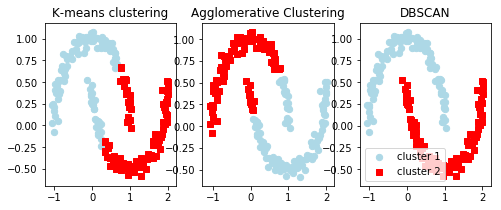

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#データをそれぞれに与えとくよ
f, (ax_k, ax_s, ax_d) = plt.subplots(1,3,figsize=(8,3))

#k-means法
km = KMeans(n_clusters = 2,
            random_state = 0)
y_km = km.fit_predict(x)
ax_k.scatter(x[y_km==0,0],
             x[y_km==0,1],
             c = 'lightblue',
             marker = 'o',
             s = 40,
             label = 'cluster 1')
ax_k.scatter(x[y_km==1,0],
             x[y_km==1,1],
             c = 'red',
             marker='s',
             s = 40,
             label = 'cluster 2')
ax_k.set_title('K-means clustering')

#凝集型階層的クラスタリング
ac = AgglomerativeClustering(n_clusters = 2,
                             affinity = 'euclidean',
                             linkage = 'complete')
y_ac = ac.fit_predict(x)
ax_s.scatter(x[y_ac==0,0],
             x[y_ac==0,1],
             c = 'lightblue',
             marker = 'o',
             s = 40,
             label = 'cluster 1')
ax_s.scatter(x[y_ac==1,0],
             x[y_ac==1,1],
             c = 'red',
             marker='s',
             s = 40,
             label = 'cluster 2')
ax_s.set_title('Agglomerative Clustering')

#DBSCAN
db = DBSCAN(eps = 0.2,
            min_samples = 5,
            metric = 'euclidean')
y_db = db.fit_predict(x)
ax_d.scatter(x[y_db==0,0],
             x[y_db==0,1],
             c = 'lightblue',
             marker = 'o',
             s = 40,
             label = 'cluster 1')
ax_d.scatter(x[y_db==1,0],
             x[y_db==1,1],
             c = 'red',
             marker='s',
             s = 40,
             label = 'cluster 2')
ax_d.set_title('DBSCAN')


plt.legend()
plt.show()

DBSCANの特長：任意の形状をもつデータのクラスタリングができている様子がよくわかった。

DBSCANの欠点：トレーニングデータセットのサイズが固定ならば、データセットの特徴量の個数が増えるに従って、次元の呪いのネガティブな影響が強まる。とくにEuclid距離を指標にしている場合は要注意。また、効果を最大化するには、ハイパーパラメータ$MinPts,\varepsilon$を最適化する必要がある。データセットの密度の違いが比較的大きい場合、最適か組み合わせの発見は難しい場合もある。